![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session /: Text processing - Introduction to Spacy



**Resources:**
* Spacy website

# Spacy installation

```
$ conda activate bts36
$ conda install -c conda-forge spacy
```



# Spacy introduction

## Import language models 



```
$ python -m spacy download en_core_web_sm
$ python -m spacy download en
```



In [2]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 4.6 MB/s eta 0:00:01
You should consider upgrading via the '/Users/miguelsanz/bts/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
You should consider upgrading via the '/Users/miguelsanz/bts/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Once the model is downloaded and installed, we can load it as follows:

In [53]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Linguistic annotations

spaCy's linguistic annotation types:

*   Word types
*   Parts of speech
*   How words are related to each other



### Word and sentence tokenization

In [54]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [6]:
text_sentence_1 = "This is a class about text processing."

In [7]:
# We pass the sentence to the doc
doc1 = nlp(text_sentence_1)
type(doc1)

spacy.tokens.doc.Doc

[What is a **Doc**?](https://spacy.io/api/doc) It is a sequence of Token objects. Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings.

And [what is a **Token**?](https://spacy.io/api/token) It is a word, punctuation symbol, whitespace, etcetera.

In [8]:
# Let's tokenize th sentence
for token in doc1:
    print(token)

This
is
a
class
about
text
processing
.


In [9]:
doc1[0]

This

In [10]:
doc1[-1]

.

#### Linguistic features/annotation
spaCy does not only have a record the position as if we will be splitting the sentence. spaCy records the grammatical structure of the sentence. 

So after tokenization (splitting the sentence into the individual components), spaCy can do **Part-of-speech** (POS) tagging. This is done by using spaCy's statistical models to make predictions of what each token is. For instance, a word following "the" in the English is most likely a noun. And that's why we need language models.

---

We have the following features that we can get per token:

*   **Text**: The original word text.
*   **Lemma**: The base form of the word.
*   **POS**: The simple part-of-speech tag.
*   **Tag**: The detailed part-of-speech tag.
*   **Dep**: Syntactic dependency, i.e. the relation between tokens.
*   **Shape**: The word shape – capitalization, punctuation, digits.
*   **is alpha**: Is the token an alphanumeric character?
*   **is stop**: Is the token part of a stop list, i.e. the most common words of the language?





In [12]:
text_sentence_2 = "The coffee this morning costed me $4, that is extremely expensive!"
doc2 = nlp(text_sentence_2)

for token in doc2:
    print(token.text, token.pos_, token.dep_)

The DET det
coffee NOUN nsubj
this DET det
morning NOUN npadvmod
costed VERB ROOT
me PRON dobj
$ SYM nmod
4 NUM dobj
, PUNCT punct
that PRON nsubj
is AUX relcl
extremely ADV advmod
expensive ADJ acomp
! PUNCT punct


In [56]:
spacy.explain("dobj")

'direct object'

In [18]:
# We can build a Pandas Dataframe with the contents of a token/doc loop, just for nice visualization
import pandas as pd

d = []
for token in doc2:
    d.append({'TEXT': token.text, 'LEMMA': token.lemma_, 
              'POS': token.pos_, 'TAG': token.tag_,
              'DEP': token.dep_, 'SHAPE': token.shape_,
              'ALPHA': token.is_alpha, 'STOP': token.is_stop})

spacy_dataframe = pd.DataFrame(d)
spacy_dataframe

,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,The,the,DET,DT,det,Xxx,True,True
1,coffee,coffee,NOUN,NN,nsubj,xxxx,True,False
2,this,this,DET,DT,det,xxxx,True,True
3,morning,morning,NOUN,NN,npadvmod,xxxx,True,False
4,costed,cost,VERB,VBD,ROOT,xxxx,True,False
5,me,I,PRON,PRP,dobj,xx,True,True
6,$,$,SYM,$,nmod,$,False,False
7,4,4,NUM,CD,dobj,d,False,False
8,",",",",PUNCT,",",punct,",",False,False
9,that,that,PRON,WDT,nsubj,xxxx,True,True


#### Do not feel lost! Let's visualize this.

In [59]:
# We can use spacy.explain when lost
spacy.explain("VBZ")

'verb, 3rd person singular present'

In [20]:
spacy.explain("advmod")

'adverbial modifier'

In [27]:
import spacy
from spacy import displacy

# Show POS and synthatic dependencies
displacy.render(doc2, style="dep", jupyter=True, options={'distance': 100})

#### Naming entities



> spaCy features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens. The default model identifies a variety of named and numeric entities, including companies, locations, organizations and products. You can add arbitrary classes to the entity recognition system, and update the model with new examples.



In [28]:
# The entity visualizer highlights named entities and their labels in the text
displacy.render(doc2, style="ent", jupyter=True, options={'distance': 100})

#### In class exercise:

Try it yourself. Write a sentence, visualize the synthatic dependencies and the entities within the sentence:

#### Tokenization rules

The tokenization applies rules specific to each language. For instance, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Also don't should be split as **do** and **not** and such.

Those form part of the tokenizer exceptions, that make all that decisions for each language model on whether to split a word or not.

* **Tokenizer exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied.
* **Prefix**: Character(s) at the beginning, e.g. $, (, “, ¿.
* **Suffix**: Character(s) at the end, e.g. km, ), ”, !.
* **Infix**: Character(s) in between, e.g. -, --, /, ….

If we want to change the tokenization or add some, we will need to create our own rules (rarely used unless you are dealing with scientific/slang languages).

In [29]:
text_sentence_3 = "I was accepted at UCL-CV Master in U.K., but I didn't have enough money for it!"

In [30]:
"""
With Python we can also split the text using .split().

The problem is that we do not retain contextual token information.
Such as do/not or punctuations such as commas or exclamations.
"""

text_sentence_3.split(' ')

['I',
 'was',
 'accepted',
 'at',
 'UCL-CV',
 'Master',
 'in',
 'U.K.,',
 'but',
 'I',
 "didn't",
 'have',
 'enough',
 'money',
 'for',
 'it!']

In [31]:
doc3 = nlp(text_sentence_3)

for token in doc3:
    print(token.text)

I
was
accepted
at
UCL
-
CV
Master
in
U.K.
,
but
I
did
n't
have
enough
money
for
it
!


##### Creating our own rule

Global and language-specific tokenizer data is supplied via the language data in spacy/lang. The tokenizer exceptions define special cases like “don’t” in English, which needs to be split into two tokens: {ORTH: "do"} and {ORTH: "n't", NORM: "not"}. The prefixes, suffixes and infixes mostly define punctuation rules – for example, when to split off periods (at the end of a sentence), and when to leave tokens containing periods intact (abbreviations like “U.S.”).

![alt text](https://spacy.io/language_data-ef63e6a58b7ec47c073fb59857a76e5f.svg)

Anything that’s specific to a domain or text type – like financial trading abbreviations, or Bavarian youth slang – should be added as a special case rule to your tokenizer instance. If you’re dealing with a lot of customizations, it might make sense to create an entirely custom subclass.

In [32]:
import spacy

nlp = spacy.load("en_core_web_sm")

text_sentence_4 = "Hey, gimme your money" 

doc4 = nlp(text_sentence_4)

for token in doc4:
    print(token.text)

Hey
,
gimme
your
money


In [33]:
import spacy
from spacy.symbols import ORTH

nlp = spacy.load("en_core_web_sm") 

text_sentence_4 = "Hey, gimme your money" 
doc4 = nlp(text_sentence_4)

# Add special case rule
special_case = [{ORTH: "gim"}, {ORTH: "me"}]
nlp.tokenizer.add_special_case("gimme", special_case)

In [34]:
text_sentence_4 = "Hey, gimme your money" 

doc4 = nlp(text_sentence_4)

for token in doc4:
    print(token.text)

Hey
,
gim
me
your
money


##### Long sentences and weird spaces

In [35]:
text_sentence_5 = 'Some\nspaces  and\ttab characters'

doc5 = nlp(text_sentence_5)

for token in doc5:
    print(token.text)

Some


spaces
 
and
	
tab
characters


In [36]:
doc5[1].is_space

True

In [60]:
# Spacy can also recognize sentences without weird splits
text_sentence_6 = "In ancient Rome, some neighbors live in three adjacent houses. In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates). One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero. Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin)."

doc6 = nlp(text_sentence_6)

for sent in doc6.sents:
    print(sent)

In ancient Rome, some neighbors live in three adjacent houses.
In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus.
A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom.
One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates).
One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero.
Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).


### Lemmatization

Lemmatization is the assignation of the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.

In [38]:
nlp("they are neighbours")[-1].lemma_

'neighbour'

In [39]:
nlp("is")[0].lemma_

'be'

In [40]:
doc6[0]

In

In [41]:
doc6[0].lemma_

'in'

In [42]:
# Getting information about a token
doc6.vocab['be']

#### Dealing with STOP words
In computing, stop words are words which are filtered out before processing of natural language data (text). Stop words are generally the most common words in a language; there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools avoid removing stop words to support phrase search.

In [43]:
# Getting STOP words
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

{'i', 'sixty', 'forty', 'throughout', '’ve', 'of', '’re', 'say', 'otherwise', 'everything', 'whence', 'very', 'becomes', 'former', 'has', 'latterly', "'m", 'eight', 'only', 'ever', "'ll", 'that', 'just', 'give', 'whenever', 'thru', 'nowhere', 'where', 'have', 'thereafter', 'along', 'might', 'any', 'neither', 'hereafter', 'herself', 'also', 'rather', 'somehow', 'these', "'re", 'its', 'anyhow', 'whereby', 'even', 'when', 'back', 'against', 'or', 'nevertheless', 'this', 'on', 'four', 'yet', 'some', 'whereupon', 'per', 'much', 'meanwhile', 'wherein', 'then', 'whole', 'yours', 'someone', 'beforehand', 'whether', 'off', 'last', 'several', 'everyone', 'never', 'front', 'top', 'nor', 'become', 'if', 'mine', 'although', 'hence', 'during', '’ll', '’m', 'those', 'whither', "'s", 'from', 'put', 'somewhere', 'latter', 'both', 'such', 'except', 'enough', 'unless', 'were', 'us', 'nothing', 'whoever', 'twenty', 'is', '‘d', 'must', 'once', 'they', 'next', 'over', 'would', 'our', 'often', "n't", 'see', 

In [44]:
print(doc6[0], "--> is stopword in list above? -->", doc6[0] in STOP_WORDS)

In --> is stopword in list above? --> False


"In" is not found in the list of common words, however spaCy changes automatically to lower case to find that actually "In" is "in" and therefore is a stopword.

In [45]:
doc6[0].is_stop

True

### In class exercise:

Display a table with all the tokens of `text1` and the columns `["Text", "Lemma", "Coarse POS (pos)", "Fine POS (tag)", "Syntactic dependency", "Shape", "Alphanumeric", "Stop"]`. Look in https://spacy.io/api/token#attributes for hints. Something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Text</th>
      <th>Lemma</th>
      <th>Coarse POS (pos)</th>
      <th>Fine POS (tag)</th>
      <th>Syntactic dependency</th>
      <th>Shape</th>
      <th>Alphanumeric</th>
      <th>Stop</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>This</td>
      <td>this</td>
      <td>DET</td>
      <td>DT</td>
      <td>nsubj</td>
      <td>Xxxx</td>
      <td>True</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>is</td>
      <td>be</td>
      <td>VERB</td>
      <td>VBZ</td>
      <td>ROOT</td>
      <td>xx</td>
      <td>True</td>
      <td>True</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>

Also, create a dependency and entity graph of the sentence.

Use the following sentence:

In [46]:
exercise_sentece = "This is great! We are learning text processing with spaCy"

## spaCy pipelines

When we call `nlp` on a text, spaCy tokenizes the text to produce a `Doc`. The processing pipeline has different steps that are removed from the complexity of the user but that [can be tweaked if needed](https://spacy.io/usage/processing-pipelines).

![alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

## Entity recognition

A **named entity** is a *real-world object* that’s assigned a name – for example, a person, a country, a product or a book title.


> spaCy can recognize [many types of named entities](https://spacy.io/api/annotation#named-entities), by predicting over a language model. Results are not 100% accurate as models are statistical and depends on the examples they are trained on, but this can be fine tuned for you later on.



Named entities can be accessed from the *ents* properties of a spaCy *Doc*:

In [47]:
text_sentence_7 = u'Apple is looking at buying U.K. startup for 1 billion USD'
doc7 = nlp(text_sentence_7)

There are certain entity properties that can be accessed:

* **Text**: The original entity text.
* **Start**: Index of start of entity in the Doc.
* **End**: Index of end of entity in the Doc.
* **Label**: Entity label, i.e. type.

In [48]:
for ent in doc7.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
1 billion USD 44 57 MONEY


In [49]:
displacy.render(doc7, style="ent", jupyter=True)

In [50]:
displacy.render(doc6, style="ent", jupyter=True)

## Word vectors and similarity

The similarity or distance between two words can be done by comparing **word vectors** or *word embeddings*, which are multi-dimensional meaning representations of a word.

Word vectors are usually created by using an algorithm like word2vec.

To make them compact and fast, spaCy’s small models (all packages that end in sm) don’t ship with word vectors, and only include context-sensitive tensors. This means you can still use the similarity() methods to compare documents, spans and tokens – but the result won’t be as good, and individual tokens won’t have any vectors assigned. So in order to use real word vectors, you need to download a larger model, such as `en_core_web_md` or `en_core_web_lg`.

**IMPORTANT!!** In Google Colab, download the following cell and then restart runtime to locate the downloaded model.

A word vector looks like the following array: 

![alt text](https://miro.medium.com/max/560/1*Bp64BP0Buo9ZZWIyh6QzEQ.png)

In [51]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 45.7 MB 3.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/miguelsanz/bts/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


The word vectors can be explored with the following techniques then:

* **Text**: The original token text.
* **has vector**: Does the token have a vector representation?
* **Vector norm**: The L2 norm of the token’s vector (the square root of the sum of the values squared)
* **OOV**: Out-of-vocabulary

In [52]:
import spacy

nlp = spacy.load("en_core_web_md")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
afskfsd False 0.0 True


The words “dog”, “cat” and “banana” are all pretty common in English, so they’re part of the model’s vocabulary, and come with a vector. The word “afskfsd” on the other hand is a lot less common and out-of-vocabulary – so its vector representation consists of 300 dimensions of 0, which means it’s practically nonexistent. 

spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. For example, you can suggest a user content that’s similar to what they’re currently looking at, or label a support ticket as a duplicate if it’s very similar to an already existing one.

Each Doc, Span and Token comes with a .similarity() method that lets you compare it with another object, and determine the similarity. Of course similarity is always subjective – whether “dog” and “cat” are similar really depends on how you’re looking at it. spaCy’s similarity model usually assumes a pretty general-purpose definition of similarity.

In [2]:
import spacy

nlp = spacy.load("en_core_web_md")  # make sure to use larger model!
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.80168545
dog banana 0.24327643
cat dog 0.80168545
cat cat 1.0
cat banana 0.28154364
banana dog 0.24327643
banana cat 0.28154364
banana banana 1.0


## The Vocab object

spaCy tries to store the data in a vocabulary, i.e. `Vocab` that is shared by multiple documents. 

To save memory, spaCy also encodes all strings to hash values – in this case for example, “coffee” has the hash 3197928453018144401. Entity labels like “ORG” and part-of-speech tags like “VERB” are also encoded. Internally, spaCy only “speaks” in hash values.

* **Token**: A word, punctuation mark etc. in context, including its attributes, tags and dependencies.
* **Lexeme**: A “word type” with no context. Includes the word shape and flags, e.g. if it’s lowercase, a digit or punctuation.
* **Doc**: A processed container of tokens in context.
* **Vocab**: The collection of lexemes.
* **StringStore**: The dictionary mapping hash values to strings, for example 3197928453018144401 → “coffee”.

Thus: 

* `Vocab` objects contain a set of look-up tables that make common information available across documents.
* Indexing the `Vocab` retrieves a `Lexeme`, which contains all the context-independent information about a word.

![alt text](https://spacy.io/vocab_stringstore-1d1c9ccd7a1cf4d168bfe4ca791e6eed.svg)



In [ ]:
nlp.vocab

In [ ]:
doc7.vocab["Apple"]

In [ ]:
lex = doc7.vocab["million"]
lex

In [ ]:
lex.shape_

'xxxx'

In [ ]:
lex.text

'million'

In [ ]:
lex.is_alpha

True

# Hands on: practical examples

## Word frequency

We can compute the word frequency on a text using spaCy. Within the Holy Grail dataset, lets:



*   Let's find the 5 most common nouns
*   Let's find the 20 most common lemmas that are not stopwords



In [7]:
!wget 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/what_da_holy.txt'

--2020-11-17 05:17:58--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/what_da_holy.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65003 (63K) [text/plain]
Saving to: ‘what_da_holy.txt’

what_da_holy.txt    100%[===================>]  63.48K  --.-KB/s    in 0.001s  

2020-11-17 05:17:58 (43.6 MB/s) - ‘what_da_holy.txt’ saved [65003/65003]



### Find the 5 most common nouns

In [9]:
import spacy

nlp = spacy.load("en")

holy_grail = nlp(open('what_da_holy.txt', 'r').read())

In [12]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'NOUN' and token.text not in STOP_WORDS and token.text != '#':
        char_counter[token.text] += 1

In [13]:
char_counter.most_common(5)

[('boom', 45), ('clop', 39), ('witch', 37), ('BEDEVERE', 32), ('singing', 30)]

### Find the 20 most common lemmas that are not stopwords

In [22]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

lemmas = Counter()

for token in holy_grail:
    if token.pos_ != 'PROPN' and not token.is_punct and not token.is_digit and not token.is_space and token.lower_ not in STOP_WORDS:
        lemmas[token.lemma_] += 1

In [23]:
counts = Counter(lemmas)
counts.most_common(20)

[('oh', 110),
 ('ha', 59),
 ('right', 55),
 ('yes', 53),
 ('villager', 49),
 ('boom', 45),
 ('come', 43),
 ('witch', 43),
 ('clop', 39),
 ('away', 38),
 ('look', 36),
 ('stop', 34),
 ('burn', 34),
 ('uh', 33),
 ('get', 30),
 ('tell', 30),
 ('dead', 30),
 ('singing', 30),
 ('mumble', 30),
 ('music', 29)]

### Your turn

* Let's find the 5 most common verbs
* Let's find the 5 most common personal names
* Let's find the 20 most common lemmas that are not stopwords, not numbers and not personal names

## Dispersion plots

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each proper noun appear among the 5 most frequent ones.
2. Visualize the appearances of the character that is named the most.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.

In [54]:
from spacy import load

nlp = load("en")

In [55]:
holy_grail = nlp(open("what_da_holy.txt", 'r').read())

In [56]:
# We are using Counter to start the tuple madness
from collections import Counter

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'PROPN':
        char_counter[token.text] += 1

In [92]:
char_counter.most_common(10)

[('ARTHUR', 225),
 ('LAUNCELOT', 76),
 ('GALAHAD', 69),
 ('KNIGHT', 68),
 ('FATHER', 62),
 ('HEAD', 53),
 ('Sir', 52),
 ('GUARD', 52),
 ('Ni', 47),
 ('KNIGHTS', 37)]

We get Sir or HEAD within the characters, actually HEAD is a character, but Sir is not, let's change that using a `special case`, instead of the longer and ardous task of training.

* HEAD should be HEAD KNIGHT
* NI should be KNIGHTS OF NI 

In [86]:
import spacy

from spacy.symbols import ORTH, POS, NOUN, VERB, TAG, PROPN

nlp_modified = spacy.load('en')
nlp_modified.tokenizer.add_special_case('Sir', [{ORTH: 'Sir', POS: NOUN, TAG: NOUN}])
nlp_modified.tokenizer.add_special_case('HEAD', [{ORTH: 'HEAD KNIGHT', POS: PROPN, TAG: PROPN}])
nlp_modified.tokenizer.add_special_case('KNIGHT', [{ORTH: 'HEAD KNIGHT', POS: PROPN, TAG: PROPN}])
nlp_modified.tokenizer.add_special_case('NI', [{ORTH: 'KNIGHTS OF NI', POS: PROPN, TAG: PROPN}])
nlp_modified.tokenizer.add_special_case('Ni', [{ORTH: 'KNIGHTS OF NI', POS: PROPN, TAG: PROPN}])

Let's try it again

In [87]:
holy_grail2 = nlp_modified(open("what_da_holy.txt", 'r').read())

In [88]:
from collections import Counter

char_counter2 = Counter()

for token in holy_grail2:
    if token.pos_ == 'PROPN':
        char_counter2[token.text] += 1

In [90]:
char_counter2.most_common(5)

[('ARTHUR', 225),
 ('HEAD KNIGHT', 122),
 ('LAUNCELOT', 76),
 ('GALAHAD', 69),
 ('KNIGHTS OF NI', 62)]

### Visualize the most

In [118]:
char_counter2.most_common(1)

[('ARTHUR', 225)]

In [119]:
names, _ = zip(*char_counter2.most_common(1))

In [120]:
print(names)

('ARTHUR',)


In [121]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [122]:
indexes = defaultdict(list)

for token in holy_grail2:
    if token.text in names:
        indexes[token.text].append(token.i)

In [123]:
print(indexes)

defaultdict(<class 'list'>, {'ARTHUR': [13, 37, 83, 147, 162, 188, 225, 250, 271, 316, 343, 393, 454, 468, 530, 1255, 1266, 1293, 1314, 1341, 1373, 1412, 1500, 1536, 1550, 1652, 1682, 1701, 1740, 1766, 1788, 1810, 1842, 1862, 1884, 1983, 2015, 2055, 2083, 2116, 2308, 2399, 2412, 2442, 2469, 2476, 2490, 2501, 2521, 2543, 2562, 2593, 2604, 2636, 2652, 2683, 2708, 2725, 2744, 2763, 2788, 2802, 2824, 2855, 2883, 3899, 4150, 4168, 4203, 4219, 4393, 4440, 4465, 4663, 4746, 4801, 4838, 4878, 4986, 5012, 5052, 5130, 5146, 5183, 5216, 5270, 5358, 5448, 5497, 5534, 5583, 5620, 5799, 5855, 5889, 5920, 9040, 9086, 9104, 9140, 9180, 9205, 9281, 9309, 9367, 9396, 9444, 9478, 9504, 9526, 9536, 9577, 9608, 9623, 13098, 13137, 13166, 13209, 13240, 13256, 13272, 13293, 13319, 13326, 13344, 13361, 13376, 13386, 13412, 13474, 13524, 13542, 13588, 13680, 13719, 13846, 13864, 13908, 13939, 13975, 14093, 14124, 14216, 14251, 14282, 14586, 14638, 14661, 14678, 14701, 14739, 14791, 14848, 14891, 14950, 14970, 

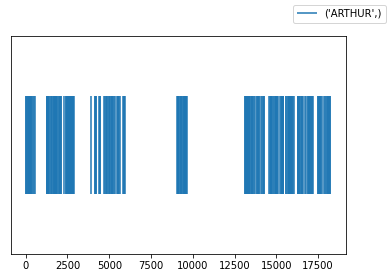

In [128]:
fig, axes = plt.subplots()

axes.eventplot(indexes['ARTHUR'], label=names)
axes.get_yaxis().set_visible(False)

fig.legend()

### Visualize all

In [104]:
char_counter2.most_common(5)

[('ARTHUR', 225),
 ('HEAD KNIGHT', 122),
 ('LAUNCELOT', 76),
 ('GALAHAD', 69),
 ('KNIGHTS OF NI', 62)]

In [105]:
names, _ = zip(*char_counter2.most_common(5))

In [106]:
print(names, _)

('ARTHUR', 'HEAD KNIGHT', 'LAUNCELOT', 'GALAHAD', 'KNIGHTS OF NI') (225, 122, 76, 69, 62)


In [107]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [108]:
indexes = defaultdict(list)

for token in holy_grail2:
    if token.text in names:
        print(token.i)
        indexes[token.text].append(token.i)

13
37
83
147
162
188
225
250
271
316
343
393
454
468
530
1255
1266
1293
1314
1341
1373
1412
1500
1536
1550
1652
1682
1701
1740
1766
1788
1810
1842
1862
1884
1983
2015
2055
2083
2116
2186
2202
2208
2226
2232
2249
2258
2261
2273
2285
2288
2298
2308
2392
2399
2405
2412
2434
2442
2460
2469
2476
2479
2490
2494
2501
2512
2521
2534
2543
2554
2562
2569
2593
2597
2604
2624
2636
2642
2652
2673
2683
2701
2708
2714
2725
2734
2744
2763
2767
2775
2788
2796
2802
2817
2824
2833
2855
2859
2867
2883
2891
3899
4150
4168
4203
4219
4393
4429
4440
4446
4451
4465
4663
4746
4801
4838
4878
4953
4966
4986
5012
5052
5130
5135
5146
5183
5216
5251
5270
5350
5358
5411
5448
5497
5534
5583
5608
5620
5799
5855
5889
5920
6090
6098
6521
6535
6542
6554
6565
6574
6587
6601
6627
6639
6651
6657
6667
6683
6692
6699
6718
6734
6748
6778
6784
6793
6820
6828
7153
7213
7256
7274
7380
7401
7428
7461
7500
7619
7669
7691
7732
7751
7771
7801
7825
7850
7926
7946
7965
8001
8057
8138
8407
8419
8425
8432
8437
8442
8447
8452
8469
8477
848

In [109]:
print(indexes)

defaultdict(<class 'list'>, {'ARTHUR': [13, 37, 83, 147, 162, 188, 225, 250, 271, 316, 343, 393, 454, 468, 530, 1255, 1266, 1293, 1314, 1341, 1373, 1412, 1500, 1536, 1550, 1652, 1682, 1701, 1740, 1766, 1788, 1810, 1842, 1862, 1884, 1983, 2015, 2055, 2083, 2116, 2308, 2399, 2412, 2442, 2469, 2476, 2490, 2501, 2521, 2543, 2562, 2593, 2604, 2636, 2652, 2683, 2708, 2725, 2744, 2763, 2788, 2802, 2824, 2855, 2883, 3899, 4150, 4168, 4203, 4219, 4393, 4440, 4465, 4663, 4746, 4801, 4838, 4878, 4986, 5012, 5052, 5130, 5146, 5183, 5216, 5270, 5358, 5448, 5497, 5534, 5583, 5620, 5799, 5855, 5889, 5920, 9040, 9086, 9104, 9140, 9180, 9205, 9281, 9309, 9367, 9396, 9444, 9478, 9504, 9526, 9536, 9577, 9608, 9623, 13098, 13137, 13166, 13209, 13240, 13256, 13272, 13293, 13319, 13326, 13344, 13361, 13376, 13386, 13412, 13474, 13524, 13542, 13588, 13680, 13719, 13846, 13864, 13908, 13939, 13975, 14093, 14124, 14216, 14251, 14282, 14586, 14638, 14661, 14678, 14701, 14739, 14791, 14848, 14891, 14950, 14970, 

0
1
2
3
4


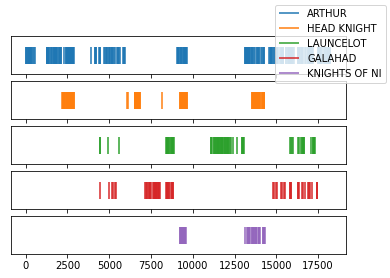

In [110]:
fig, axes = plt.subplots(5, sharex=True)

for index, name in enumerate(names):
    print(index)
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)

fig.legend()

## Your turn:

* Try to plot the NOUNS and clean the Doc whenever necessary adding special cases

* Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-dsf-2020/blob/raw/data/pride_and_prejudice.txt)